# EDA – Fruit & Vegetable Recognition Dataset

Auto‑generated notebook covering basic statistics, distributions, and sample visuals for the dataset located in `data/processed/`.

**Generated:** callable via pipeline – feel free to add more analysis cells as needed.

In [3]:
import pathlib, random, json, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

DATA_DIR = pathlib.Path('data/processed/train')
assert DATA_DIR.exists(), f'Directory {DATA_DIR} does not exist'


## Class Distribution – Train

grapes       89
peas         85
pineapple    83
lettuce      82
soy beans    81
dtype: int64


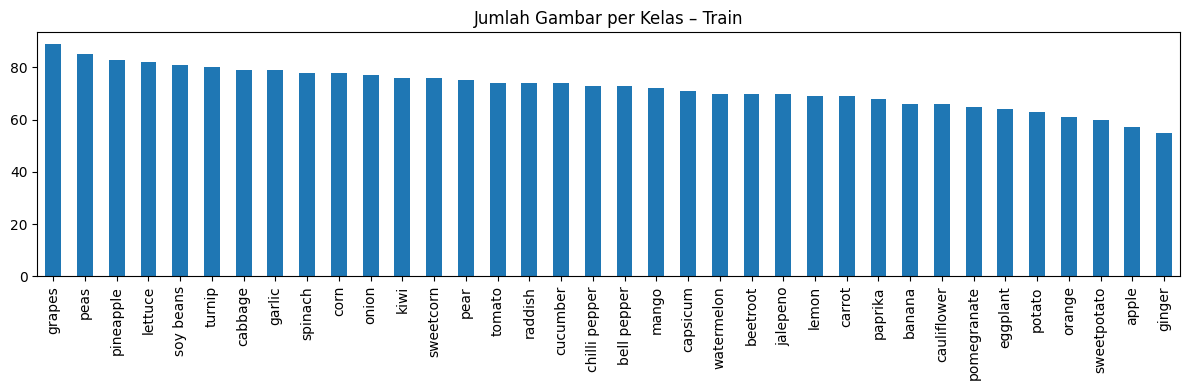

In [4]:
counts = Counter(p.parent.name for p in DATA_DIR.rglob('*.*'))
dist = pd.Series(counts).sort_values(ascending=False)
print(dist.head())
plt.figure(figsize=(12,4))
dist.plot.bar()
plt.title('Jumlah Gambar per Kelas – Train')
plt.tight_layout()

## Image Size Distribution

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@149.179] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@156.279] global grfmt_png.cpp:695 read_chunk chunk data is too large


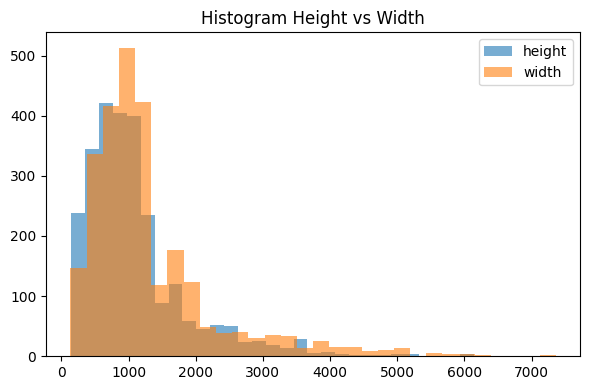

In [5]:
sizes = []
for p in DATA_DIR.rglob('*.*'):
    img = cv2.imread(str(p))
    if img is not None:
        sizes.append(img.shape[:2])  # (h, w)

heights = [s[0] for s in sizes]
widths  = [s[1] for s in sizes]
plt.figure(figsize=(6,4))
plt.hist(heights, bins=30, alpha=0.6, label='height')
plt.hist(widths,  bins=30, alpha=0.6, label='width')
plt.legend()
plt.title('Histogram Height vs Width')
plt.tight_layout()

## Sample Mosaic 6×6

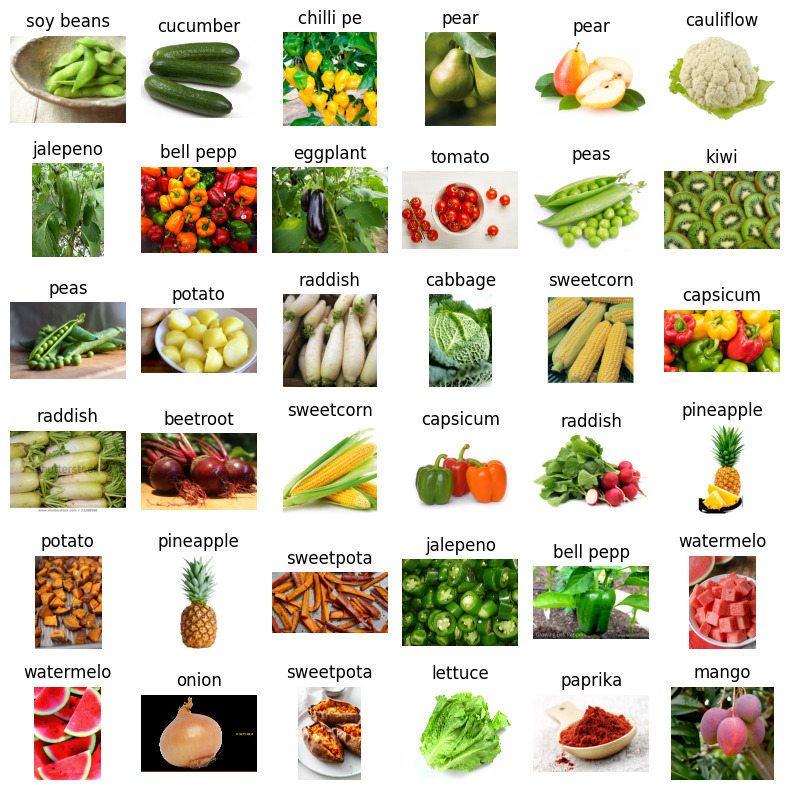

In [6]:
fig, axs = plt.subplots(6,6, figsize=(8,8))
all_images = list(DATA_DIR.rglob('*.*'))
random.shuffle(all_images)
for ax, p in zip(axs.ravel(), all_images[:36]):
    img = cv2.cvtColor(cv2.imread(str(p)), cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(p.parent.name[:9])
    ax.axis('off')
plt.tight_layout()

## Channel Statistics

In [7]:
accum = np.zeros(3)
accum_sq = np.zeros(3)
n_pixels = 0
for p in DATA_DIR.rglob('*.*'):
    img = cv2.imread(str(p))
    if img is None: continue
    img = img[:, :, ::-1] / 255.0  # BGR to RGB, scale 0‑1
    n_pixels += img.shape[0] * img.shape[1]
    accum += img.sum(axis=(0,1))
    accum_sq += (img**2).sum(axis=(0,1))

mean = accum / n_pixels
std  = np.sqrt(accum_sq / n_pixels - mean**2)
print({'mean': mean.tolist(), 'std': std.tolist()})

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@452.908] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@507.907] global grfmt_png.cpp:695 read_chunk chunk data is too large


{'mean': [0.6157158371352478, 0.5788086620352052, 0.4171609470238098], 'std': [0.30557846207735656, 0.2971615374476785, 0.3439032612842093]}


## Potential Outliers (Dark or Too Small)

In [8]:
problem_files = []
for p in DATA_DIR.rglob('*.*'):
    img = cv2.imread(str(p))
    if img is None: continue
    h, w = img.shape[:2]
    if h < 64 or w < 64 or img.mean() < 15:
        problem_files.append((p, (h,w), img.mean()))
problem_files[:10]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@620.749] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@628.089] global grfmt_png.cpp:695 read_chunk chunk data is too large


[]

## Insight Summary

- Terdapat imbalance yang moderat—perbedaan antara kelas terbanyak vs terendah hanya sekitar 1.5×. Namun jika kita ingin mencapai akurasi tinggi di semua kelas, sebaiknya tetap menimbang strategi penanganan imbalance:
    - Weighted loss di training (misalnya class_weight pada Keras/TensorFlow)
    - Oversampling stratified pada kelas yang lebih sedikit
    - Data augmentation lebih agresif (menambah lebih banyak sampel untuk kelas‐kelas kecil)
- Sebagian besar gambar berada di rentang resolusi cukup besar (> 600 × 600). Untuk pipeline CNN ringan, kita bisa resize ke 128 × 128 atau 160 × 160 tanpa kehilangan detail signifikan
- Ada beberapa outlier (gambar sangat lebar atau sangat tinggi): perlu dipastikan tidak ada sprit yang memicu bug cropping (misalnya ratio sangat ekstrem)
- Nilai mean untuk setiap channel (R, G, B) sekitar 0.42 – 0.62 (skala 0–1). Artinya, secara umum piksel cenderung lebih “cerah” pada channel Merah (R), sedikit lebih rendah pada Hijau (G), dan paling rendah untuk Biru (B)
- Std dev sekitar 0.30 – 0.34: menunjukkan variasi warna yang cukup tinggi di dataset (berbagai macam buah & sayur punya rona segar yang berbeda)